In [66]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
%matplotlib inline
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime
import calendar
import scipy.stats as stat

In [67]:
df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")


/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
df.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220337 entries, 0 to 220336
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      220337 non-null  int64  
 1   Created Date                    220337 non-null  object 
 2   Closed Date                     218754 non-null  object 
 3   Agency                          220337 non-null  object 
 4   Agency Name                     220337 non-null  object 
 5   Complaint Type                  220337 non-null  object 
 6   Descriptor                      215783 non-null  object 
 7   Location Type                   220209 non-null  object 
 8   Incident Zip                    218462 non-null  float64
 9   Incident Address                188561 non-null  object 
 10  Street Name                     188561 non-null  object 
 11  Cross Street 1                  184931 non-null  object 
 12  Cross Street 2  

In [18]:
df.shape

(220337, 53)

In [19]:
df.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,2.203370e+05,218462.000000,2.177930e+05,217793.000000,0.0,0.0,0.0,0.0,0.0,217793.000000,217793.000000
mean,3.156487e+07,10854.222712,1.004904e+06,203581.635980,NaN,NaN,NaN,NaN,NaN,40.725410,-73.925446
std,4.232401e+05,575.165666,2.190724e+04,30033.241758,NaN,NaN,NaN,NaN,NaN,0.082433,0.079008
min,3.083752e+07,83.000000,9.133570e+05,121411.000000,NaN,NaN,NaN,NaN,NaN,40.499673,-74.254937
25%,3.120426e+07,10312.000000,9.921490e+05,182877.000000,NaN,NaN,NaN,NaN,NaN,40.668554,-73.971510
50%,3.155706e+07,11209.000000,1.003322e+06,200886.000000,NaN,NaN,NaN,NaN,NaN,40.718013,-73.931180
75%,3.192709e+07,11238.000000,1.018603e+06,224290.000000,NaN,NaN,NaN,NaN,NaN,40.782295,-73.876003
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


In [20]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

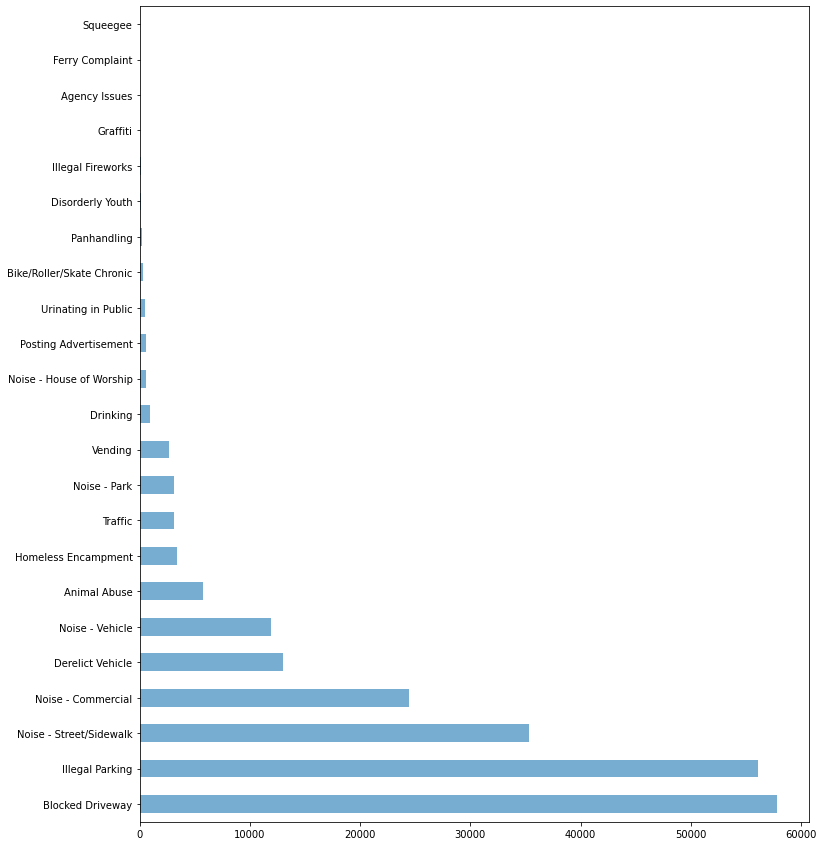

In [21]:
df['Complaint Type'].value_counts().plot(kind='barh',alpha=0.6, figsize=(12,15))
plt.show()

In [22]:
df['City'].value_counts()

BROOKLYN               72194
NEW YORK               47128
BRONX                  30229
STATEN ISLAND           9335
JAMAICA                 5286
ASTORIA                 4658
FLUSHING                4471
RIDGEWOOD               3746
CORONA                  3229
WOODSIDE                2635
SOUTH RICHMOND HILL     2100
EAST ELMHURST           2091
ELMHURST                2003
OZONE PARK              1994
MASPETH                 1865
WOODHAVEN               1829
LONG ISLAND CITY        1768
SOUTH OZONE PARK        1618
FRESH MEADOWS           1463
RICHMOND HILL           1364
QUEENS VILLAGE          1343
MIDDLE VILLAGE          1323
FOREST HILLS            1267
JACKSON HEIGHTS         1248
REGO PARK               1140
COLLEGE POINT            921
BAYSIDE                  874
FAR ROCKAWAY             840
WHITESTONE               804
HOWARD BEACH             723
HOLLIS                   700
ROSEDALE                 682
SPRINGFIELD GARDENS      668
SAINT ALBANS             641
ROCKAWAY PARK 

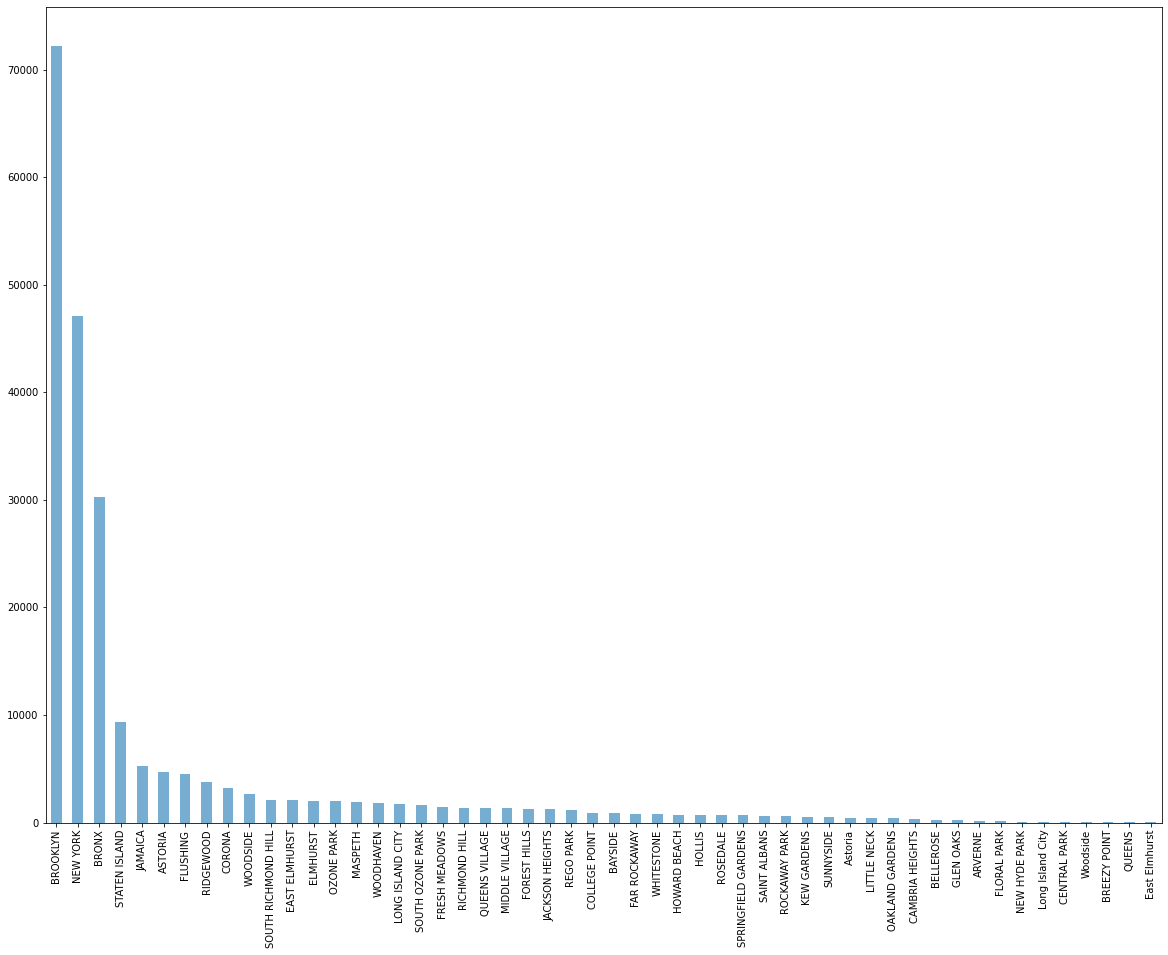

In [23]:
df['City'].value_counts().plot(kind='bar', alpha=0.6, figsize=(20,15))
plt.show()

In [24]:
df[['Complaint Type','City']].head(50)

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
1,Blocked Driveway,ASTORIA
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,ELMHURST
5,Illegal Parking,BROOKLYN
6,Illegal Parking,NEW YORK
7,Blocked Driveway,BRONX
8,Illegal Parking,KEW GARDENS
9,Blocked Driveway,BROOKLYN


In [26]:
groupBycomplainType = df.groupby('Complaint Type')

In [28]:
grp_data = groupBycomplainType.get_group('Blocked Driveway')
grp_data.shape

(57842, 53)

In [30]:
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         1583
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          4554
Location Type                        128
Incident Zip                        1875
Incident Address                   31776
Street Name                        31776
Cross Street 1                     35406
Cross Street 2                     35736
Intersection Street 1             188977
Intersection Street 2             189313
Address Type                        2018
City                                1875
Landmark                          220080
Facility Type                       1584
Status                                 1
Due Date                               4
Resolution Description                 1
Resolution Action Updated Date      1606
Community Board                        1
Borough         

In [33]:
df['Agency Name'].value_counts()

New York City Police Department    300690
Internal Affairs Bureau                 6
NYPD                                    2
Name: Agency Name, dtype: int64

In [34]:
df['Complaint Type'].value_counts().head(5)


Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Name: Complaint Type, dtype: int64

In [35]:
df['Latitude'].value_counts().head(5)

40.830362    902
40.721959    505
40.703819    480
40.647132    362
40.708726    341
Name: Latitude, dtype: int64

In [5]:
data_mod = df.drop(columns=['Unique Key'],axis=1)

In [40]:
data_mod.columns

Index(['Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
  

In [41]:
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Created Date                    300698 non-null  object 
 1   Closed Date                     298534 non-null  object 
 2   Agency                          300698 non-null  object 
 3   Agency Name                     300698 non-null  object 
 4   Complaint Type                  300698 non-null  object 
 5   Descriptor                      294784 non-null  object 
 6   Location Type                   300567 non-null  object 
 7   Incident Zip                    298083 non-null  float64
 8   Incident Address                256288 non-null  object 
 9   Street Name                     256288 non-null  object 
 10  Cross Street 1                  251419 non-null  object 
 11  Cross Street 2                  250919 non-null  object 
 12  Intersection Str

## 2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing

In [44]:
data_mod['Closed Date'] = pd.to_datetime(data_mod['Closed Date'])
data_mod['Created Date'] = pd.to_datetime(data_mod['Created Date'])

data_mod['Request_Closing_Time'] = data_mod['Closed Date'] - data_mod['Created Date']

#data_mod = data_mod[(data_mod.Request_Closing_Time)>=0]

In [41]:
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Created Date                    300698 non-null  object 
 1   Closed Date                     298534 non-null  object 
 2   Agency                          300698 non-null  object 
 3   Agency Name                     300698 non-null  object 
 4   Complaint Type                  300698 non-null  object 
 5   Descriptor                      294784 non-null  object 
 6   Location Type                   300567 non-null  object 
 7   Incident Zip                    298083 non-null  float64
 8   Incident Address                256288 non-null  object 
 9   Street Name                     256288 non-null  object 
 10  Cross Street 1                  251419 non-null  object 
 11  Cross Street 2                  250919 non-null  object 
 12  Intersection Str

In [45]:
data_mod.sample(4)

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
209227,2015-06-22 17:04:47,2015-06-23 02:37:17,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,10305.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.588447,-74.095908,"(40.58844673355417, -74.09590820834552)",0 days 09:32:30
70270,2015-10-23 12:28:16,2015-10-23 14:38:00,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11218.0,816 BEVERLY ROAD,BEVERLY ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.643593,-73.971400,"(40.643593154509716, -73.97139978812707)",0 days 02:09:44
215864,2015-06-17 08:45:28,2015-06-17 09:12:09,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11417.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.674163,-73.851299,"(40.67416255314253, -73.85129862594015)",0 days 00:26:41
296041,2015-04-03 16:56:00,2015-04-03 18:45:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,10463.0,3498 FORT INDEPENDENCE STREET,FORT INDEPENDENCE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.882262,-73.898182,"(40.882261883639515, -73.89818195820193)",0 days 01:49:00


## 3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining

In [18]:
data_complaint = df['Complaint Type'].value_counts()
data_complaint = data_complaint.to_frame()
data_complaint = data_complaint.rename(columns={'Complaint Type':'Counts'})
data_complaint

,Counts
Blocked Driveway,77044
Illegal Parking,75361
Noise - Street/Sidewalk,48612
Noise - Commercial,35577
Derelict Vehicle,17718
Noise - Vehicle,17083
Animal Abuse,7778
Traffic,4498
Homeless Encampment,4416
Noise - Park,4042


In [19]:
data_complaint['Percentage'] = np.around((data_complaint.Counts/data_complaint.Counts.sum())*100,decimals=2)
data_complaint

,Counts,Percentage
Blocked Driveway,77044,25.62
Illegal Parking,75361,25.06
Noise - Street/Sidewalk,48612,16.17
Noise - Commercial,35577,11.83
Derelict Vehicle,17718,5.89
Noise - Vehicle,17083,5.68
Animal Abuse,7778,2.59
Traffic,4498,1.50
Homeless Encampment,4416,1.47
Noise - Park,4042,1.34


In [20]:
data_complaint = data_complaint[data_complaint.Percentage>1.0]
data_complaint = data_complaint.reset_index()
data_complaint = data_complaint.rename(columns={'index':'Complaint Type'})
data_complaint

,Complaint Type,Counts,Percentage
0,Blocked Driveway,77044,25.62
1,Illegal Parking,75361,25.06
2,Noise - Street/Sidewalk,48612,16.17
3,Noise - Commercial,35577,11.83
4,Derelict Vehicle,17718,5.89
5,Noise - Vehicle,17083,5.68
6,Animal Abuse,7778,2.59
7,Traffic,4498,1.50
8,Homeless Encampment,4416,1.47
9,Noise - Park,4042,1.34


Text(0.5, 1.0, 'Proportion of different complaint type (major)')

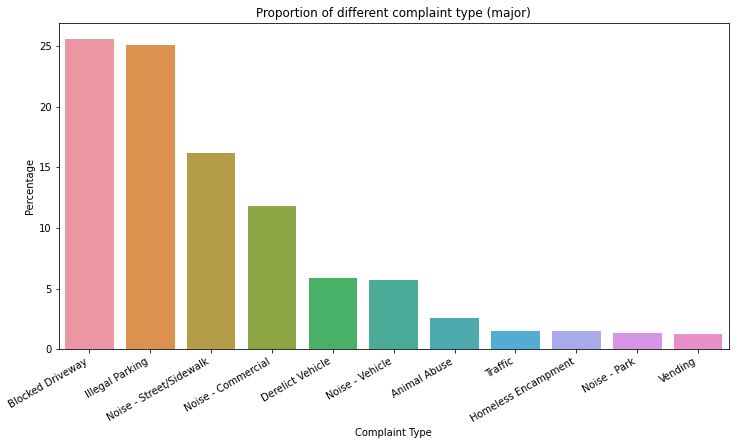

In [25]:
plt.figure(figsize=(12,6))
com_type = sns.barplot(x=data_complaint['Complaint Type'],y=data_complaint.Percentage,data=data_complaint)
com_type.set_xticklabels(com_type.get_xticklabels(), rotation=30, ha="right")
plt.title('Proportion of different complaint type (major)')

In [26]:
data_descriptor = np.around(((data_mod['Descriptor'].value_counts()*100) / data_mod['Descriptor'].value_counts().sum()),
                            decimals=2)
data_descriptor = data_descriptor.to_frame()
data_descriptor = data_descriptor.rename(columns={'Descriptor':'Percentage'})
data_descriptor['Descriptor'] = data_descriptor.index
cols = data_descriptor.columns.tolist()
cols = cols[-1:]+cols[:-1]
data_descriptor = data_descriptor[cols]
data_descriptor = data_descriptor[(data_descriptor.Percentage) >= 2.0]
data_descriptor = data_descriptor.reset_index()
data_descriptor = data_descriptor.drop(columns=['index'],axis=1)
data_descriptor

,Descriptor,Percentage
0,Loud Music/Party,20.84
1,No Access,19.33
2,Posted Parking Sign Violation,7.61
3,Loud Talking,7.32
4,Partial Access,6.81
5,With License Plate,6.01
6,Blocked Hydrant,5.46
7,Commercial Overnight Parking,4.13
8,Car/Truck Music,3.82
9,Blocked Sidewalk,3.77


In [27]:
data_location_type = np.around(((data_mod['Location Type'].value_counts()*100) / data_mod['Location Type'].value_counts().sum()),
                            decimals=2)
data_location_type = data_location_type.to_frame()
data_location_type = data_location_type.rename(columns={'Location Type':'Percentage'})
data_location_type['Location Type'] = data_location_type.index
cols = data_location_type.columns.tolist()
cols = cols[-1:]+cols[:-1]
data_location_type = data_location_type[cols]
data_location_type = data_location_type[(data_location_type.Percentage) >= 0.1]
data_location_type = data_location_type.reset_index()
data_location_type = data_location_type.drop(columns=['index'],axis=1)
data_location_type

,Location Type,Percentage
0,Street/Sidewalk,82.94
1,Store/Commercial,6.78
2,Club/Bar/Restaurant,5.78
3,Residential Building/House,2.32
4,Park/Playground,1.59
5,House of Worship,0.31


In [28]:
data_city = np.around(((data_mod['City'].value_counts()*100) / data_mod['City'].value_counts().sum()),
                            decimals=2)
data_city = data_city.to_frame()
data_city = data_city.rename(columns={'City':'Percentage'})
data_city['City'] = data_city.index
cols = data_city.columns.tolist()
cols = cols[-1:]+cols[:-1]
data_city = data_city[cols]
data_city = data_city[(data_city.Percentage) >= 1.0]
data_city = data_city.reset_index()
data_city = data_city.drop(columns=['index'],axis=1)
data_city

,City,Percentage
0,BROOKLYN,32.98
1,NEW YORK,22.14
2,BRONX,13.65
3,STATEN ISLAND,4.14
4,JAMAICA,2.45
5,ASTORIA,2.12
6,FLUSHING,2.00
7,RIDGEWOOD,1.73
8,CORONA,1.44
9,WOODSIDE,1.19


In [29]:
data_address_type = np.around(((data_mod['Address Type'].value_counts()*100) / data_mod['Address Type'].value_counts().sum()),
                            decimals=2)
data_address_type = data_address_type.to_frame()
data_address_type = data_address_type.rename(columns={'Address Type':'Percentage'})
data_address_type['Address Type'] = data_address_type.index
cols = data_address_type.columns.tolist()
cols = cols[-1:]+cols[:-1]
data_address_type = data_address_type[cols]
#data_address_type = data_address_type[(data_address_type.Percentage) >= 1.0]
data_address_type = data_address_type.reset_index()
data_address_type = data_address_type.drop(columns=['index'],axis=1)
data_address_type

,Address Type,Percentage
0,ADDRESS,80.11
1,INTERSECTION,14.56
2,BLOCKFACE,4.03
3,LATLONG,1.18
4,PLACENAME,0.12


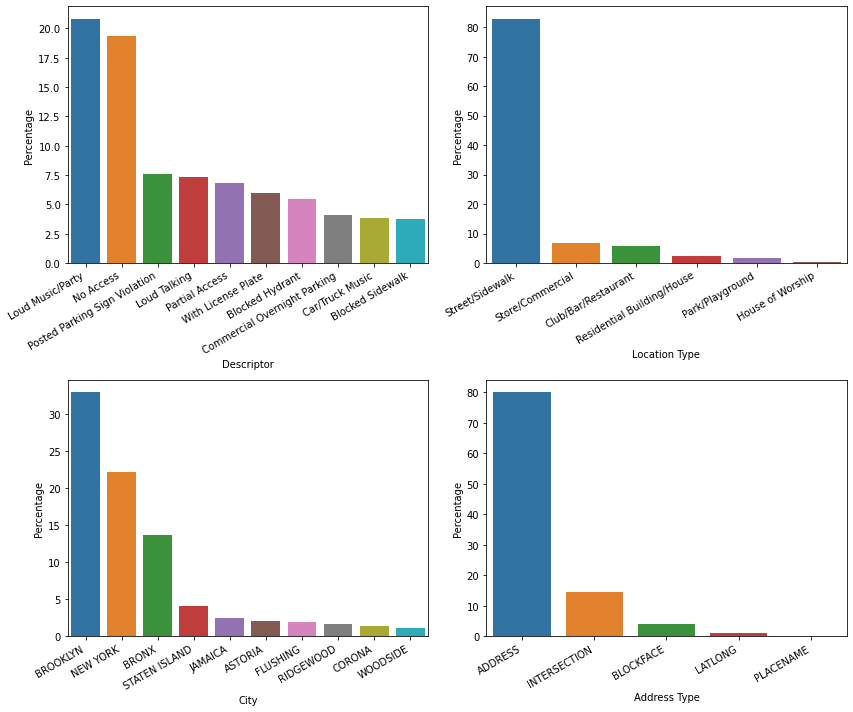

In [30]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

#sns.set_theme(style="whitegrid")
#plt.suptitle("Proportion of different outcomes for few interesting features.")

descriptor = sns.barplot(ax=ax[0,0],x=data_descriptor.Descriptor,y=data_descriptor.Percentage,)
descriptor.set_xticklabels(descriptor.get_xticklabels(), rotation=30, ha="right")

location_type = sns.barplot(ax=ax[0,1],x=data_location_type['Location Type'],y=data_location_type.Percentage,)
location_type.set_xticklabels(location_type.get_xticklabels(), rotation=30, ha="right")

city = sns.barplot(ax=ax[1,0],x=data_city['City'],y=data_city.Percentage,)
city.set_xticklabels(city.get_xticklabels(), rotation=30, ha="right")

address = sns.barplot(ax=ax[1,1],x=data_address_type['Address Type'],y=data_address_type.Percentage,)
address.set_xticklabels(address.get_xticklabels(), rotation=30, ha="right")


#plt.subplots_adjust(left=None, bottom=None, right=None, top=0.0, wspace=None, hspace=None)
plt.tight_layout()

In [47]:
data_place_CType_RCTime = data_mod[['City','Complaint Type','Request_Closing_Time']]
data_place_CType_RCTime.dropna(subset = ['City','Complaint Type','Request_Closing_Time'], inplace = True)
data_place_CType_RCTime['DeltaT(in_hr.)'] = np.around( (data_place_CType_RCTime['Request_Closing_Time'].astype(np.int64)/
                                                      (pow(10,9)*3600) ), decimals=2)
neg_time = data_place_CType_RCTime[data_place_CType_RCTime['DeltaT(in_hr.)'] < 0].sum()
print('The no negative time difference (Created Time > Clossing Time, which is not possible) = \n',neg_time)
#data_place_CType_RCTime['DeltaT(in sec)/Avg.'] = np.around((data_place_CType_RCTime['DeltaT(in sec)']/Avarage_time),decimals=1)
data_place_CType_RCTime.head(6)

The no negative time difference (Created Time > Clossing Time, which is not possible) = 
 City                    0.0
Complaint Type          0.0
Request_Closing_Time    0.0
DeltaT(in_hr.)          0.0
dtype: float64


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,City,Complaint Type,Request_Closing_Time,DeltaT(in_hr.)
0,NEW YORK,Noise - Street/Sidewalk,0 days 00:55:15,0.92
1,ASTORIA,Blocked Driveway,0 days 01:26:16,1.44
2,BRONX,Blocked Driveway,0 days 04:51:31,4.86
3,BRONX,Illegal Parking,0 days 07:45:14,7.75
4,ELMHURST,Illegal Parking,0 days 03:27:02,3.45
5,BROOKLYN,Illegal Parking,0 days 01:53:30,1.89


In [48]:
Avarage_time = np.around((data_place_CType_RCTime['DeltaT(in_hr.)'].mean()),decimals=2)
print('Avarage time gap between logging the complaint and problem solved = ',Avarage_time, 'hour')
Central_val = np.around((data_place_CType_RCTime['DeltaT(in_hr.)'].median()),decimals=2)
print('Central value of the distribution = ',Central_val, 'hour')
Most_occoor = np.around((data_place_CType_RCTime['DeltaT(in_hr.)'].mode()),decimals=2)
print('Most occered value = ',Most_occoor, 'hour')
stand_dev = np.around((data_place_CType_RCTime['DeltaT(in_hr.)'].std()),decimals=2)
print('Deviation is = ',stand_dev)

Avarage time gap between logging the complaint and problem solved =  4.31 hour
Central value of the distribution =  2.71 hour
Most occered value =  0    0.88
dtype: float64 hour
Deviation is =  6.08


In [49]:
conditions = [data_place_CType_RCTime['DeltaT(in_hr.)'] <= 0.5, 
             (0.50 < data_place_CType_RCTime['DeltaT(in_hr.)']) & (data_place_CType_RCTime['DeltaT(in_hr.)'] <= 1.00),
             (1.00 < data_place_CType_RCTime['DeltaT(in_hr.)']) & (data_place_CType_RCTime['DeltaT(in_hr.)'] <= 2.00),
             (2.00 < data_place_CType_RCTime['DeltaT(in_hr.)']) & (data_place_CType_RCTime['DeltaT(in_hr.)'] <= 6.00),
             (6.00 < data_place_CType_RCTime['DeltaT(in_hr.)']) & (data_place_CType_RCTime['DeltaT(in_hr.)'] <= 10.00),
             (10.00 < data_place_CType_RCTime['DeltaT(in_hr.)'])]

choices = ['Super fast','Very fast','Fast','Normal','Slow','Super Slow']

data_place_CType_RCTime['Solution Status'] = np.select(conditions,choices)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [50]:
data_place_CType_RCTime.head(6)

,City,Complaint Type,Request_Closing_Time,DeltaT(in_hr.),Solution Status
0,NEW YORK,Noise - Street/Sidewalk,0 days 00:55:15,0.92,Very fast
1,ASTORIA,Blocked Driveway,0 days 01:26:16,1.44,Fast
2,BRONX,Blocked Driveway,0 days 04:51:31,4.86,Normal
3,BRONX,Illegal Parking,0 days 07:45:14,7.75,Slow
4,ELMHURST,Illegal Parking,0 days 03:27:02,3.45,Normal
5,BROOKLYN,Illegal Parking,0 days 01:53:30,1.89,Fast


In [51]:
data_place_CType_RCTime['Solution Status'].value_counts()


Normal        118955
Fast           58549
Slow           38068
Very fast      33459
Super Slow     24871
Super fast     24126
Name: Solution Status, dtype: int64

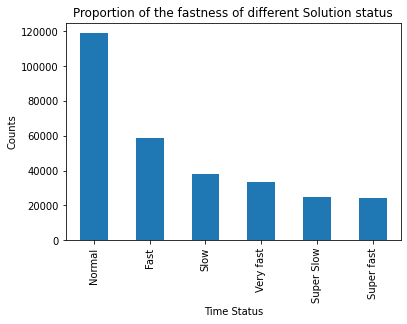

<Figure size 432x288 with 0 Axes>

In [52]:
data_place_CType_RCTime['Solution Status'].value_counts().plot(kind='bar')
plt.xlabel('Time Status')
plt.ylabel('Counts')
plt.title('Proportion of the fastness of different Solution status')
plt.show()
plt.tight_layout()

In [53]:
data_mod['Created Date'].head(5)

0   2015-12-31 23:59:45
1   2015-12-31 23:59:44
2   2015-12-31 23:59:29
3   2015-12-31 23:57:46
4   2015-12-31 23:56:58
Name: Created Date, dtype: datetime64[ns]

In [54]:
Year_Month_Day = pd.to_datetime(data_mod['Created Date'].dt.date)
Month_Day = pd.DataFrame()
Month_Day['Date'] = pd.to_datetime(Year_Month_Day.dt.date)
Month_Day['Month'] = Year_Month_Day.dt.month
Month_Day['Day'] = Year_Month_Day.dt.day
Month_Day['Month Name'] = Month_Day['Month'].apply(lambda x: calendar.month_abbr[x])
Month_Day['Day No'] = Month_Day['Date'].dt.weekday
Month_Day['Day Name'] = Month_Day['Day No'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',
                                                 5:'Saturday',6:'Sunday'})
Month_Day.sample(20)

,Date,Month,Day,Month Name,Day No,Day Name
277477,2015-04-24,4,24,Apr,4,Friday
243330,2015-05-24,5,24,May,6,Sunday
212788,2015-06-19,6,19,Jun,4,Friday
238757,2015-05-28,5,28,May,3,Thursday
291062,2015-04-09,4,9,Apr,3,Thursday
109290,2015-09-18,9,18,Sep,4,Friday
289727,2015-04-11,4,11,Apr,5,Saturday
176333,2015-07-21,7,21,Jul,1,Tuesday
287432,2015-04-14,4,14,Apr,1,Tuesday
217586,2015-06-15,6,15,Jun,0,Monday


In [55]:
Month_plot = Month_Day['Month Name'].value_counts()
Month_plot = Month_plot.to_frame()
Month_plot = Month_plot.rename(columns={'Month Name':'Counts'})
Month_plot

,Counts
May,36437
Sep,35427
Jun,35315
Aug,34956
Jul,34888
Oct,32605
Nov,30773
Dec,30521
Apr,27305
Mar,2471


In [56]:
Day_plot = Month_Day['Day Name'].value_counts()
Day_plot = Day_plot.to_frame()
Day_plot = Day_plot.rename(columns={'Day Name':'Counts'})
Day_plot

,Counts
Sunday,47969
Saturday,47564
Friday,43995
Thursday,41342
Monday,40489
Wednesday,39788
Tuesday,39551


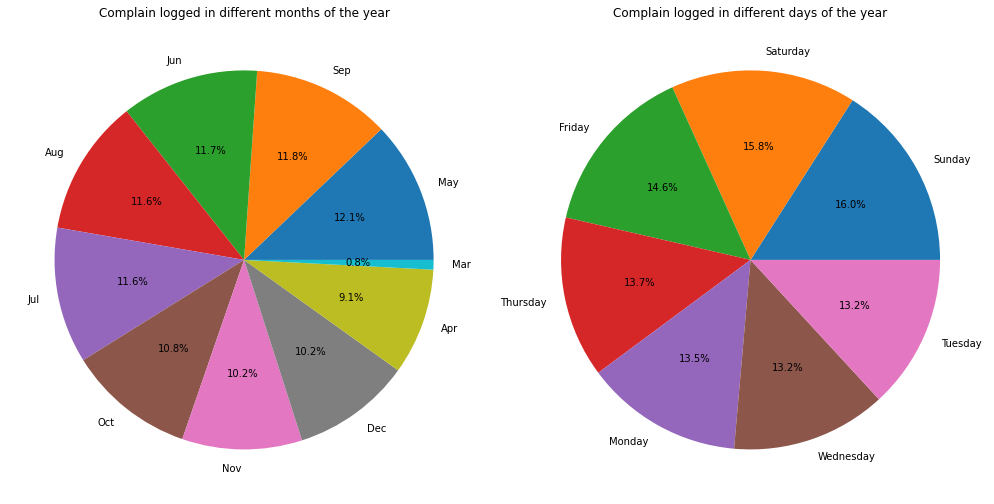

In [57]:
fig, axes = plt.subplots(1,2, figsize=(14,8))

axes[0].pie(Month_plot['Counts'], labels = Month_plot.index,autopct='%1.1f%%')
axes[0].set_title('Complain logged in different months of the year')

axes[1].pie(Day_plot['Counts'], labels = Day_plot.index,autopct='%1.1f%%')
axes[1].set_title('Complain logged in different days of the year')

plt.tight_layout()

In [58]:
Month_Day_grouped = Month_Day.groupby(['Month Name','Day Name'],as_index=False)['Day No'].count()
Month_Day_grouped_final = Month_Day_grouped.rename(columns={'Day No':'Counts'})
Month_Day_grouped_final.head(15)

,Month Name,Day Name,Counts
0,Apr,Friday,3565
1,Apr,Monday,3222
2,Apr,Saturday,4227
3,Apr,Sunday,4069
4,Apr,Thursday,4323
5,Apr,Tuesday,3586
6,Apr,Wednesday,4313
7,Aug,Friday,4684
8,Aug,Monday,5042
9,Aug,Saturday,6913


In [59]:
Month_Day[( (Month_Day['Month Name'] == 'Apr') & (Month_Day['Day Name'] == 'Monday') )].count()

Date          3222
Month         3222
Day           3222
Month Name    3222
Day No        3222
Day Name      3222
dtype: int64

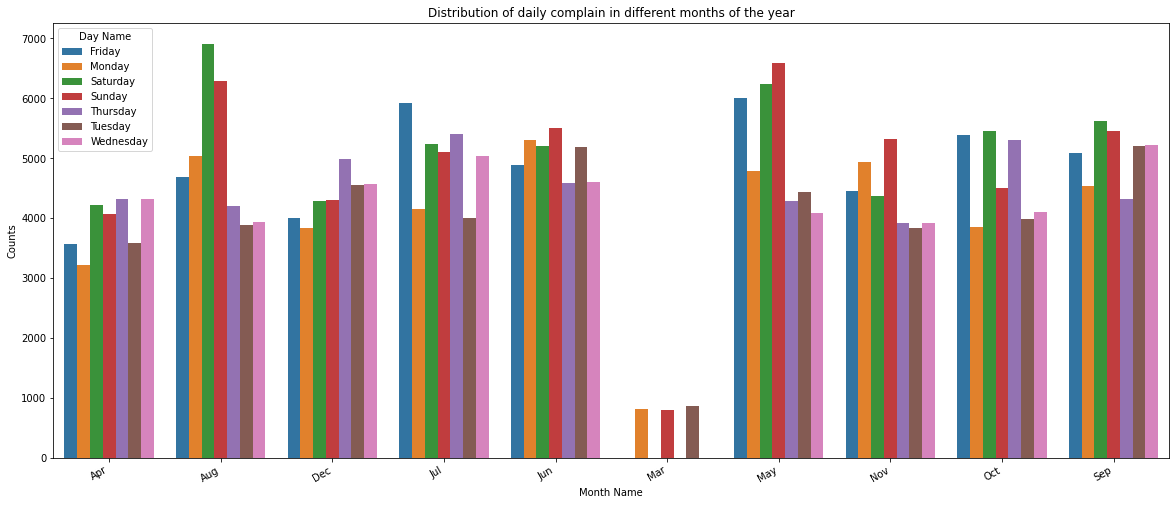

<Figure size 432x288 with 0 Axes>

In [60]:
plt.figure(figsize=(20,8))

month_day_plot = sns.barplot(x=Month_Day_grouped_final['Month Name'], y=Month_Day_grouped_final['Counts'], 
                             hue=Month_Day_grouped_final['Day Name'], data=Month_Day_grouped_final)
month_day_plot.set_xticklabels(month_day_plot.get_xticklabels(), rotation=30, ha="right")
plt.title('Distribution of daily complain in different months of the year')
plt.show()
plt.tight_layout()

In [61]:
Month_Day_grouped[Month_Day_grouped['Month Name'] == 'Mar']

,Month Name,Day Name,Day No
35,Mar,Monday,807
36,Mar,Sunday,802
37,Mar,Tuesday,862


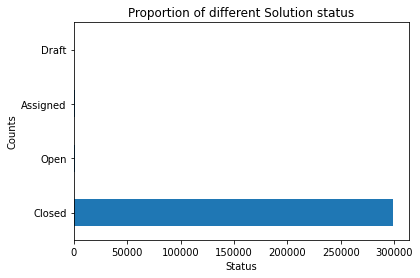

<Figure size 432x288 with 0 Axes>

In [62]:
data_mod['Status'].value_counts().plot(kind='barh')
plt.xlabel('Status')
plt.ylabel('Counts')
plt.title('Proportion of different Solution status')
plt.show()
plt.tight_layout()

## 4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations

In [63]:
Complaint_City_AvgTime_grouped = data_place_CType_RCTime.groupby(['City','Complaint Type']).agg({'DeltaT(in_hr.)':'mean'})
Complaint_City_AvgTime_grouped = Complaint_City_AvgTime_grouped.rename(
    columns={'DeltaT(in_hr.)':'Avg. Time(Given City, Complaint Type)'})
Complaint_City_AvgTime_grouped = Complaint_City_AvgTime_grouped.transform('Avg. Time(Given City, Complaint Type)')
Complaint_City_AvgTime_grouped = Complaint_City_AvgTime_grouped.to_frame()
Complaint_City_AvgTime_grouped = Complaint_City_AvgTime_grouped.sort_values(
    ['City','Avg. Time(Given City, Complaint Type)'])

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
Complaint_City_AvgTime_grouped

Avg. Time(Given City, Complaint Type)
City                Complaint Type                                                  
ARVERNE             Drinking                                                0.240000
                    Vending                                                 0.480000
                    Urinating in Public                                     0.690000
                    Panhandling                                             1.030000
                    Noise - Park                                            1.285000
                    Graffiti                                                1.530000
                    Noise - House of Worship                                1.562727
                    Homeless Encampment                                     1.812500
                    Noise - Vehicle                                         1.860000
                    Noise - Street/Sidewalk                                 1.992759
                    Animal Abuse                                            2.153158
                    Noise - Commercial                                      2.285000
                    Illegal Parking                                         2.316207
                    Blocked Driveway                                        2.526286
                    Derelict Vehicle                                        2.968519
                    Disorderly Youth                                        3.595000
ASTORIA             Panhandling                                             1.150000
                    Bike/Roller/Skate Chronic                               1.740667
                    Noise - House of Worship                                2.022632
                    Illegal Fireworks                                       2.772500
                    Disorderly Youth                                        2.903333
                    Noise - Park                                            2.994754
                    Noise - Commercial                                      3.133039
                    Noise - Street/Sidewalk                                 3.450881
                    Noise - Vehicle                                         3.509020
                    Urinating in Public                                     4.626667
                    Drinking                                                4.722571
                    Blocked Driveway                                        4.816108
                    Illegal Parking                                         4.833371
                    Homeless Encampment                                     4.918750
                    Vending                                                 4.935556
                    Animal Abuse                                            5.000640
                    Traffic                                                 5.410851
                    Posting Advertisement                                   5.870000
                    Derelict Vehicle                                        9.689145
                    Graffiti                                               14.097500
Astoria             Noise - Commercial                                      3.542069
                    Noise - Street/Sidewalk                                 3.713333
                    Illegal Parking                                         4.711362
                    Blocked Driveway                                        4.915172
                    Derelict Vehicle                                        6.234167
BAYSIDE             Traffic                                                 1.526667
                    Noise - Street/Sidewalk                                 1.530667
                    Noise - Vehicle                                         1.709375
                    Vending                                                 1.880000
                    Drinking                        

### 5. Perform a statistical test for the following:

(For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.)

 - Whether the average response time across complaint types is similar or not (overall)
 - Are the type of complaint or service requested and location related?

In [68]:
Complaint_AvgTime = data_place_CType_RCTime.groupby(['Complaint Type']).agg({'DeltaT(in_hr.)':'mean'})
Complaint_AvgTime = pd.DataFrame(Complaint_AvgTime)
Complaint_AvgTime = Complaint_AvgTime.sort_values(['DeltaT(in_hr.)']).reset_index()
Complaint_AvgTime

,Complaint Type,DeltaT(in_hr.)
0,Posting Advertisement,1.975926
1,Illegal Fireworks,2.761190
2,Noise - Commercial,3.136907
3,Noise - House of Worship,3.193240
4,Noise - Park,3.401706
5,Noise - Street/Sidewalk,3.438573
6,Traffic,3.446291
7,Disorderly Youth,3.558916
8,Noise - Vehicle,3.588570
9,Urinating in Public,3.626486


In [69]:
Tmean_without = float(Complaint_AvgTime[Complaint_AvgTime['Complaint Type']!='Animal in a Park'].mean())
print("Without complaint type 'Animal in a Park' ----- ",Tmean_without)
Tmean_with = float(Complaint_AvgTime['DeltaT(in_hr.)'].mean())
print("With complaint type 'Animal in a Park' ----- ",Tmean_with)

Without complaint type 'Animal in a Park' -----  4.0702191579496825
With complaint type 'Animal in a Park' -----  19.19566374167924


In [70]:
ttest_with, pval_with = stat.ttest_1samp(Complaint_AvgTime['DeltaT(in_hr.)'], Tmean_with)
print('T-statistic is =',ttest_with)
print('p value is =',np.around(pval_with))

T-statistic is = 0.0
p value is = 1.0


In [71]:
if (pval_with<0.05):
    print('Null hypothesis is rejected since p value ({}) is less than 0.05'.format(np.around(pval_with,decimals=2)))
else:
    print('Null hypothesis is accepted since p value ({}) is greater than 0.05'.format(np.around(pval_with,decimals=2)))

Null hypothesis is accepted since p value (1.0) is greater than 0.05


In [72]:
Complaint_AvgTime_without = Complaint_AvgTime.drop([len(Complaint_AvgTime)-1],axis=0)
Complaint_AvgTime_without

,Complaint Type,DeltaT(in_hr.)
0,Posting Advertisement,1.975926
1,Illegal Fireworks,2.761190
2,Noise - Commercial,3.136907
3,Noise - House of Worship,3.193240
4,Noise - Park,3.401706
5,Noise - Street/Sidewalk,3.438573
6,Traffic,3.446291
7,Disorderly Youth,3.558916
8,Noise - Vehicle,3.588570
9,Urinating in Public,3.626486


In [73]:
ttest_without, pval_without = stat.ttest_1samp(Complaint_AvgTime_without['DeltaT(in_hr.)'], Tmean_without)
print('T-statistic is =',ttest_without)
print('p value is =',np.around(pval_without,decimals=8))

T-statistic is = 3.210630969931075e-15
p value is = 1.0


In [74]:
if (pval_without<0.05):
    print('Null hypothesis is rejected since p value ({}) is less than 0.05'.format(np.around(pval_without,decimals=2)))
else:
    print('Null hypothesis is accepted since p value ({}) is greater than 0.05'.format(np.around(pval_without,decimals=2)))

Null hypothesis is accepted since p value (1.0) is greater than 0.05


In [75]:
sample1 = Complaint_AvgTime.sample(frac=.5)
sample1

,Complaint Type,DeltaT(in_hr.)
10,Bike/Roller/Skate Chronic,3.756611
19,Graffiti,7.151062
12,Vending,4.013619
6,Traffic,3.446291
18,Animal Abuse,5.213471
13,Squeegee,4.047500
15,Panhandling,4.372852
11,Drinking,3.855354
8,Noise - Vehicle,3.588570
3,Noise - House of Worship,3.193240


In [76]:
sample2 = Complaint_AvgTime.drop(sample1.index)
sample2

,Complaint Type,DeltaT(in_hr.)
1,Illegal Fireworks,2.761190
2,Noise - Commercial,3.136907
4,Noise - Park,3.401706
5,Noise - Street/Sidewalk,3.438573
7,Disorderly Youth,3.558916
9,Urinating in Public,3.626486
14,Homeless Encampment,4.366029
16,Illegal Parking,4.486005
17,Blocked Driveway,4.738187
20,Derelict Vehicle,7.346105


In [77]:
print('Mean of 1st sample =',np.around(float(sample1['DeltaT(in_hr.)'].mean()),decimals=2))
print('Standard dev. of 1st sample =',np.around(float(sample1['DeltaT(in_hr.)'].std()),decimals=2))
print('Mean of 2nd sample =',np.around(float(sample2['DeltaT(in_hr.)'].mean()),decimals=2))
print('Standard dev. of 2nd sample =',np.around(float(sample2['DeltaT(in_hr.)'].std()),decimals=2))

Mean of 1st sample = 4.06
Standard dev. of 1st sample = 1.3
Mean of 2nd sample = 34.34
Standard dev. of 2nd sample = 100.33


In [78]:
ttest_2sp, p_val = stat.ttest_ind(sample1['DeltaT(in_hr.)'],sample2['DeltaT(in_hr.)'])
print('T-statistic is =',ttest_2sp)
print('p value is =',np.around(p_val,decimals=2))

T-statistic is = -1.0008368620559398
p value is = 0.33


In [79]:
if (p_val<0.05):
    print('Null hypothesis is rejected since p value ({}) is less than 0.05'.format(np.around(p_val,decimals=2)))
else:
    print('Null hypothesis is accepted since p value ({}) is greater than 0.05'.format(np.around(p_val,decimals=2)))

Null hypothesis is accepted since p value (0.33) is greater than 0.05


In [80]:
sample1_anova = Complaint_AvgTime.sample(frac=1/3)
sample1_anova

,Complaint Type,DeltaT(in_hr.)
18,Animal Abuse,5.213471
3,Noise - House of Worship,3.193240
14,Homeless Encampment,4.366029
20,Derelict Vehicle,7.346105
8,Noise - Vehicle,3.588570
21,Animal in a Park,336.830000
13,Squeegee,4.047500


In [81]:
rest_data = Complaint_AvgTime.drop(sample1_anova.index)
rest_data

,Complaint Type,DeltaT(in_hr.)
0,Posting Advertisement,1.975926
1,Illegal Fireworks,2.761190
2,Noise - Commercial,3.136907
4,Noise - Park,3.401706
5,Noise - Street/Sidewalk,3.438573
6,Traffic,3.446291
7,Disorderly Youth,3.558916
9,Urinating in Public,3.626486
10,Bike/Roller/Skate Chronic,3.756611
11,Drinking,3.855354


In [82]:
sample2_anova = rest_data.sample(frac=1/2)
sample2_anova

,Complaint Type,DeltaT(in_hr.)
1,Illegal Fireworks,2.761190
0,Posting Advertisement,1.975926
6,Traffic,3.446291
9,Urinating in Public,3.626486
7,Disorderly Youth,3.558916
4,Noise - Park,3.401706
19,Graffiti,7.151062
15,Panhandling,4.372852


In [84]:
sample3_anova = rest_data.drop(sample2_anova.index)
sample3_anova

,Complaint Type,DeltaT(in_hr.)
2,Noise - Commercial,3.136907
5,Noise - Street/Sidewalk,3.438573
10,Bike/Roller/Skate Chronic,3.756611
11,Drinking,3.855354
12,Vending,4.013619
16,Illegal Parking,4.486005
17,Blocked Driveway,4.738187


In [85]:
print('Mean of 1st sample =',np.around(float(sample1_anova['DeltaT(in_hr.)'].mean()),decimals=2))
print('Standard dev. of 1st sample =',np.around(float(sample1_anova['DeltaT(in_hr.)'].std()),decimals=2))
print('Mean of 2nd sample =',np.around(float(sample2_anova['DeltaT(in_hr.)'].mean()),decimals=2))
print('Standard dev. of 2nd sample =',np.around(float(sample2_anova['DeltaT(in_hr.)'].std()),decimals=2))
print('Mean of 3rd sample =',np.around(float(sample3_anova['DeltaT(in_hr.)'].mean()),decimals=2))
print('Standard dev. of 3rd sample =',np.around(float(sample3_anova['DeltaT(in_hr.)'].std()),decimals=2))

Mean of 1st sample = 52.08
Standard dev. of 1st sample = 125.57
Mean of 2nd sample = 3.79
Standard dev. of 2nd sample = 1.53
Mean of 3rd sample = 3.92
Standard dev. of 3rd sample = 0.56


In [86]:
f_val,p_val = stat.shapiro(sample1_anova['DeltaT(in_hr.)'])
print('F-statistic is =',f_val)
print('p value is =',np.around(p_val,decimals=2))

F-statistic is = 0.46257686614990234
p value is = 0.0


In [87]:
f_val,p_val = stat.shapiro(sample2_anova['DeltaT(in_hr.)'])
print('F-statistic is =',f_val)
print('p value is =',np.around(p_val,decimals=2))

F-statistic is = 0.8321077823638916
p value is = 0.06


In [88]:
f_val,p_val = stat.shapiro(sample3_anova['DeltaT(in_hr.)'])
print('F-statistic is =',f_val)
print('p value is =',np.around(p_val,decimals=2))

F-statistic is = 0.974372386932373
p value is = 0.93


In [89]:
f_val,p_val = stat.levene(sample1_anova['DeltaT(in_hr.)'],sample2_anova['DeltaT(in_hr.)'],sample3_anova['DeltaT(in_hr.)'])
print('F-statistic is =',f_val)
print('p value is =',np.around(p_val,decimals=2))

F-statistic is = 1.0953335331679992
p value is = 0.35
